## Data Loading

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# column names assignment
headers = ['symboling', 'normalized losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('https://raw.githubusercontent.com/Anthony-Jerez/CS-Uploading-and-Processing-Data/refs/heads/main/imports-85.data', names=headers)
print(df.shape) # observations, columns
df.head()

(205, 26)


,symboling,normalized losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Exploratory Data Analysis

In [75]:
df.isnull().sum()

,0
symboling,0
normalized losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


No null values are present so no imputation or dropping is required.

In [76]:
df.dtypes


,0
symboling,int64
normalized losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


Numerical Data: Symboling, normalized losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price

Categorical Data: Make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, fuel-system

In [77]:
df.nunique() # displays number of unique values for each attribute

,0
symboling,6
normalized losses,52
make,22
fuel-type,2
aspiration,2
num-of-doors,3
body-style,5
drive-wheels,3
engine-location,2
wheel-base,53


In [78]:
df[df == '?'].count()

,0
symboling,0
normalized losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


From this we can see that the normalized-losses column contains a lot of '?' nonsensical data. A few other columns contain it as well but they don't appear as much.

In [89]:
df.replace('?', np.nan, inplace=True) # replace '?' with nan

In [90]:
numeric_cols = ['normalized losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
df[numeric_cols] = df[numeric_cols].astype(float) # convert numerical columns to float

In [51]:
# numerical median replacement
for col in ['normalized losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    df[col] = df[col].fillna(df[col].median())

# categorical mode replacement
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [60]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}\n')

symboling: [ 3  1  2  0 -1 -2]

normalized losses: [115. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129.  93. 142. 161. 153. 125. 128.
 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]

make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type: ['gas' 'diesel']

aspiration: ['std' 'turbo']

num-of-doors: ['two' 'four']

body-style: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels: ['rwd' 'fwd' '4wd']

engine-location: ['front' 'rear']

wheel-base: [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9

We print the unique values within each column to get better insight into any potential nonsensical values.

In [73]:
df.describe() # summary of statistics

,symboling,normalized losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329366,3.256098,10.142537,104.165854,5126.097561,25.219512,30.751220,13150.307317
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270858,0.313634,3.972040,39.529733,477.035772,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


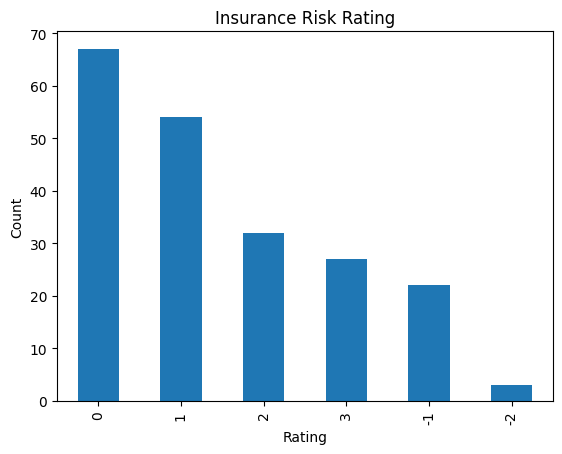

In [19]:
df['symboling'].value_counts().plot.bar(title='Insurance Risk Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Based on the above graph, an insurance risk rating of neither safe or risky appears to be assigned more often. Risky ratings appear to be assigned more often.

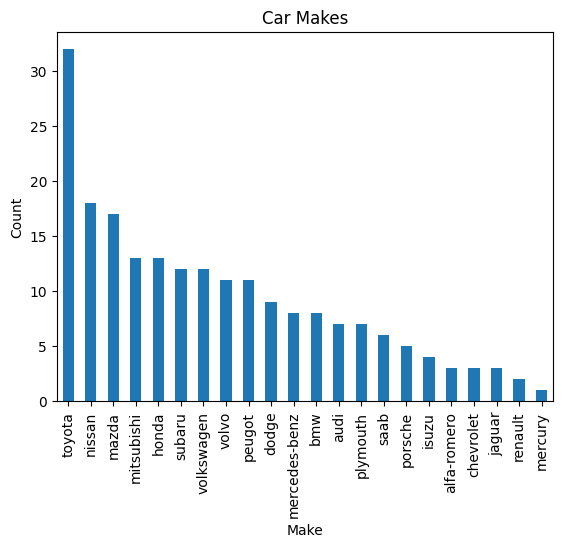

In [18]:
df['make'].value_counts().plot.bar(title='Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

Based on the above graph, the most popular car make is by far Toyota.

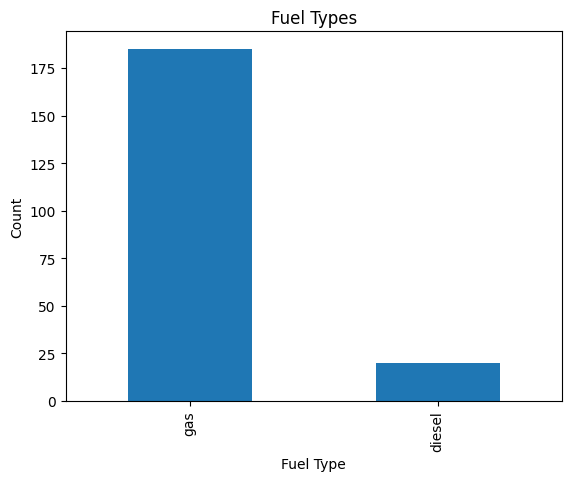

In [27]:
df['fuel-type'].value_counts().plot.bar(title='Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Based on the above graph, the most commonly assigned fuel type is gas.

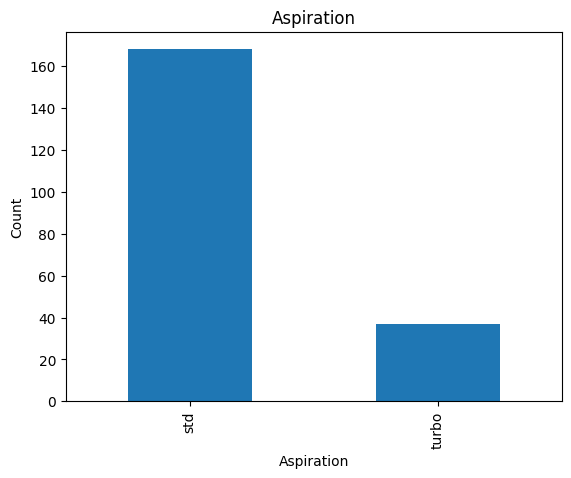

In [28]:
df['aspiration'].value_counts().plot.bar(title='Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Count')
plt.show()

Based on the above graph, the most commonly assigned aspiration is std.

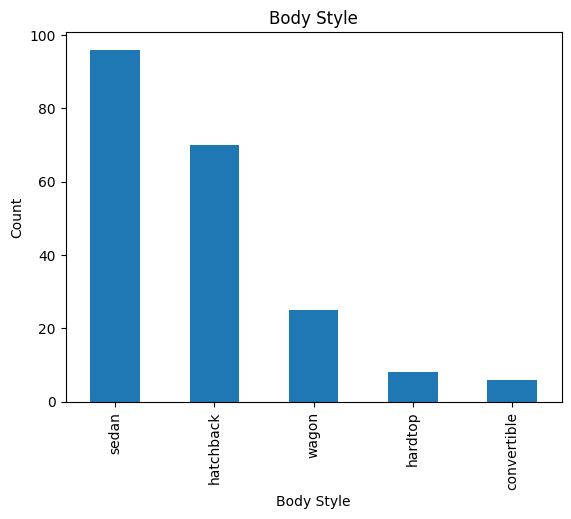

In [32]:
df['body-style'].value_counts().plot.bar(title='Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

Based on the above graph, the most popular body styles include sedan and hatchback while the least popular appear to be hardtop and convertible.

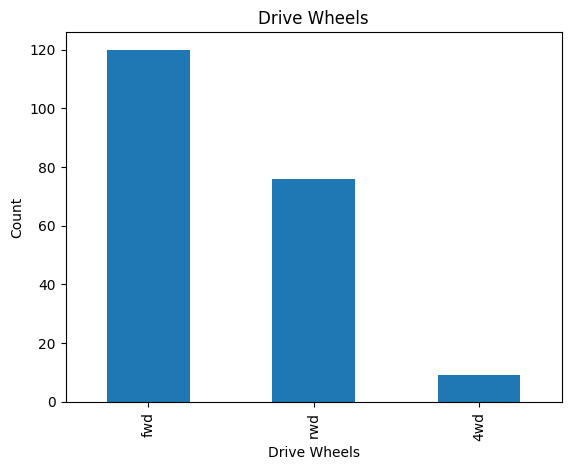

In [35]:
df['drive-wheels'].value_counts().plot.bar(title='Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Count')
plt.show()

Based on the above graph, the most popular drive wheel is fwd while the least popular drive wheel is 4wd.

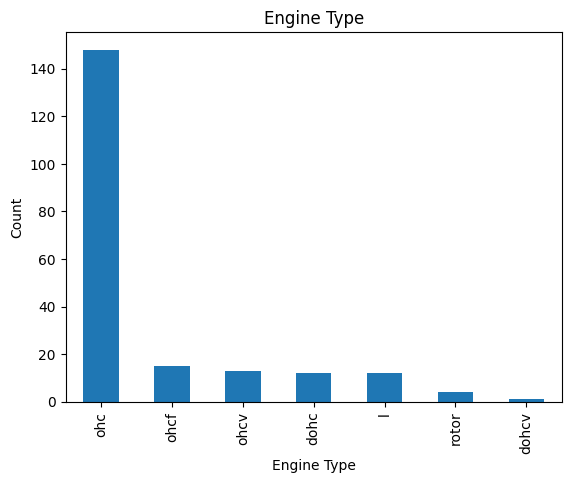

In [37]:
df['engine-type'].value_counts().plot.bar(title='Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.show()

As shown in the graph, the most popular engine type is ohc.

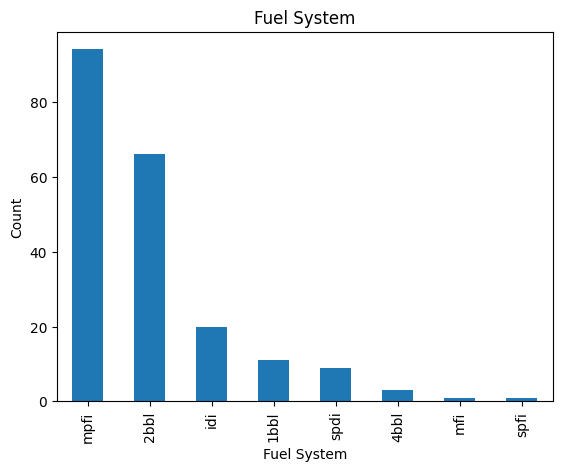

In [38]:
df['fuel-system'].value_counts().plot.bar(title='Fuel System')
plt.xlabel('Fuel System')
plt.ylabel('Count')
plt.show()

As shown in the above graph, the most popular fuel systems are mpfi and 2bbl while the least popular fuel systems are mfi and spfi.

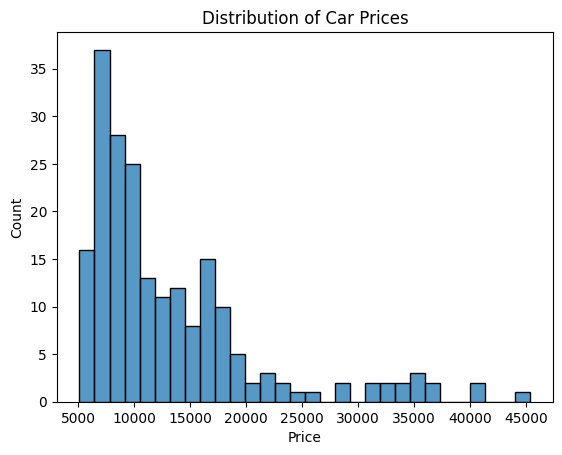

In [61]:
sns.histplot(df['price'], bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

The above graph appears to form a right skewed distribution. Most of the car prices fall on the low side and the number of cars priced at a higher price decreases as the price increases.

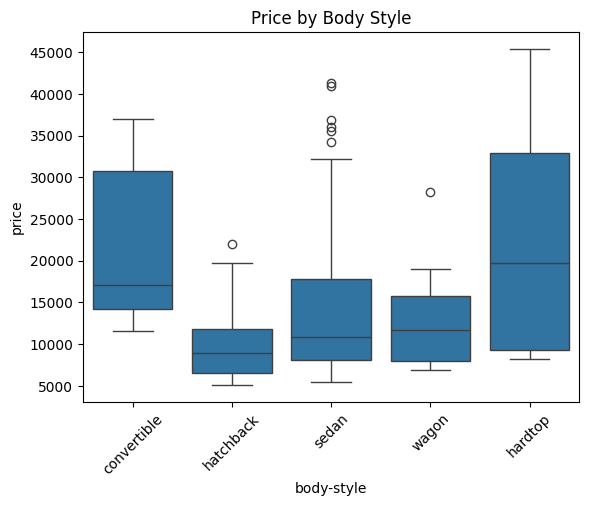

In [62]:
sns.boxplot(x='body-style', y='price', data=df)
plt.title("Price by Body Style")
plt.xticks(rotation=45)
plt.show()

Based on the above graph, the price median for the convertible and hardtop (which were the least popular body styles as seen earlier) is considerably highly when compared to the other body sytles. Also, when sedan and hatchback body styles had the lowest price median while being the most popular body styles. This indicates that affordability must play a role in the widespread appeal of sedans and hatchbacks.

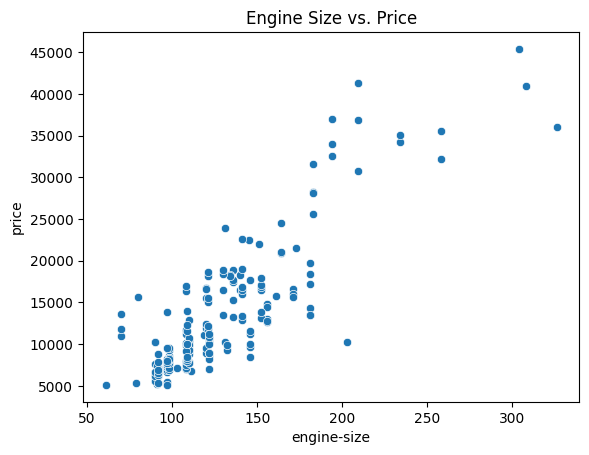

In [64]:
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title("Engine Size vs. Price")
plt.show()

Based on the above graph, the larger the engine size, the more costly the price would be. Most engine sizes are in the range of 80 - 150 while the most common price range is 5000 - 20000.

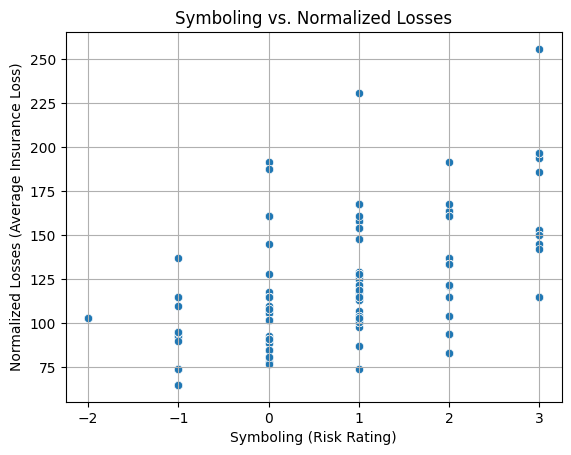

In [66]:
sns.scatterplot(x='symboling', y='normalized losses', data=df)
plt.title('Symboling vs. Normalized Losses')
plt.xlabel('Symboling (Risk Rating)')
plt.ylabel('Normalized Losses (Average Insurance Loss)')
plt.grid(True)
plt.show()

As shown in the above graph, higher-risk cars tend to incur higher losses.

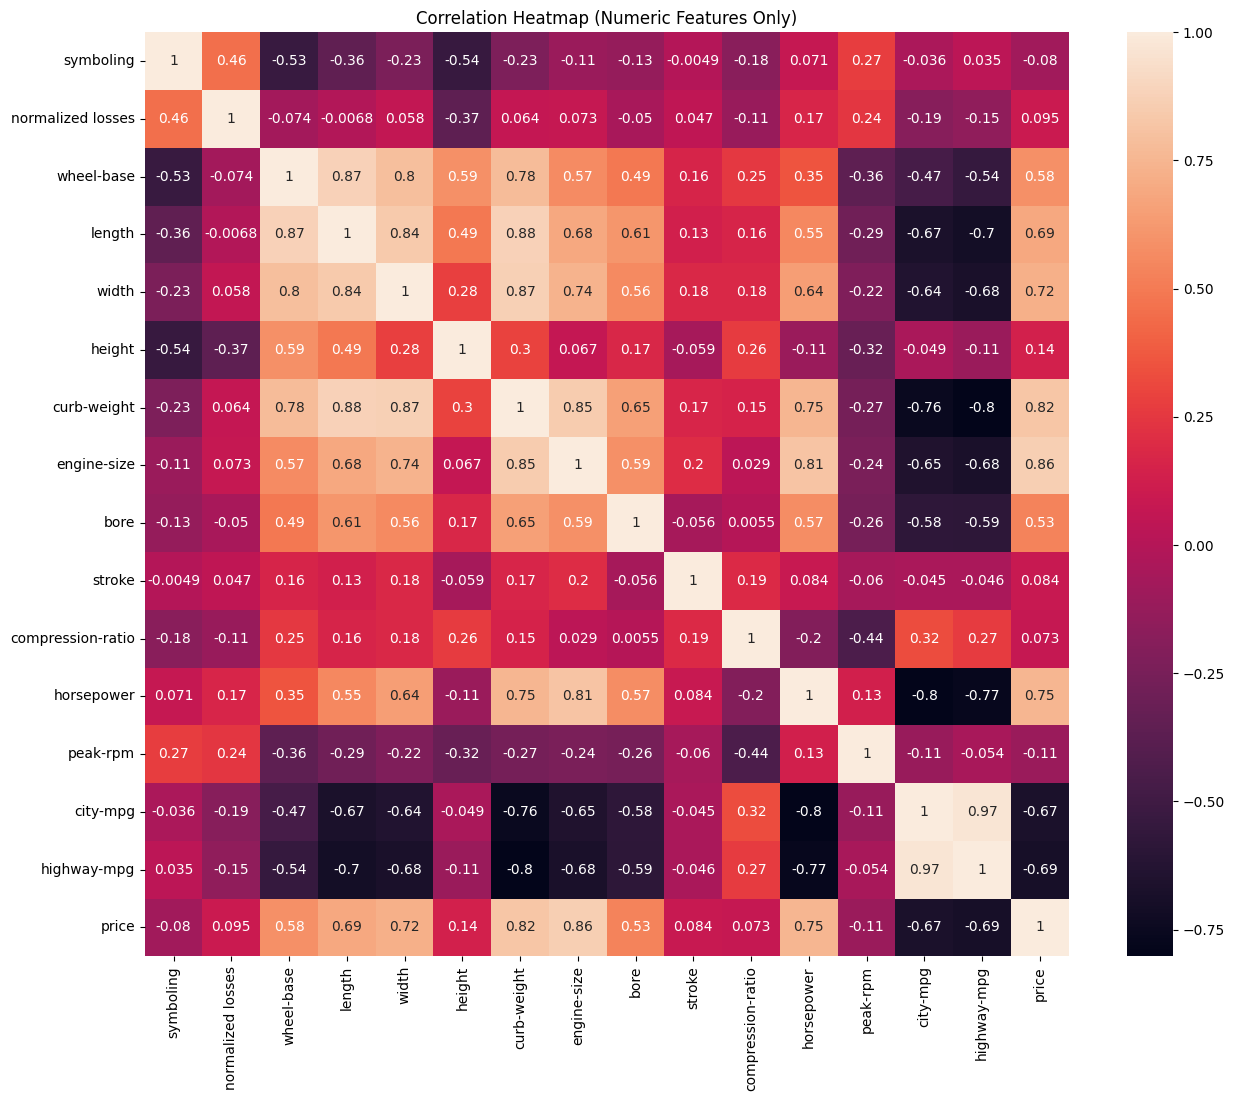

In [72]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(data=corr, square=True, annot=True, cbar=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

As shown above, the price is most impacted by engine size, curb weight, horsepower, length, and width.

## Data Preparation & Feature Engineering

### Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm? Be sure to list each relevant variable and explain why you believe each variable that you’ve identified requires the use of some sort of feature scaling method.

1. wheel-base: This is a continuous measurement and various a lot across cars. Without scaling, larger values could have a disproportionate influence on algorithms that rely on distances.
2. length: Similar to wheel-base, this feature relates to size which can vary widely.
3. width: Similar to before, it's a continuous measurement and scaling ensures fair influence.
4. height: Compared to length and width, this is on a smaller numeric scale so scaling is necessary to ensure fair representation.
5. curb-weight: It's a continuous measurement that deals with a large and wide range of values.
6. engine-size: Varies widely.
7. compression-ratio: It's numerical but its range of comprised of irregular values.
8. city-mpg: Deals on a smaller scale compared to the previously mentioned measurements and requires scaling to prevent being underrepresented.
9. highway-mpg: Similar to city-mpg, it's on a small scale and measured in different until compared to width and length. Thus, scaling is needed to ensure fair representation.
10. symboling: It can be potentially binarized for binary classification (risky/not risky). It can and should be standardized.

### Consider the number-of-doors and price variables: Based on your EDA work, how many missing data values occur within each of these attributes? As we've learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set. Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

There are 2 missing values in num-of-doors column and 4 missing values within the price column.

In [97]:
from sklearn.impute import KNNImputer

df_copy = df.copy()
numeric_impute_columns = ['normalized losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
knn_imputer = KNNImputer(n_neighbors=5)
df_copy[numeric_impute_columns] = knn_imputer.fit_transform(df_copy[numeric_impute_columns])


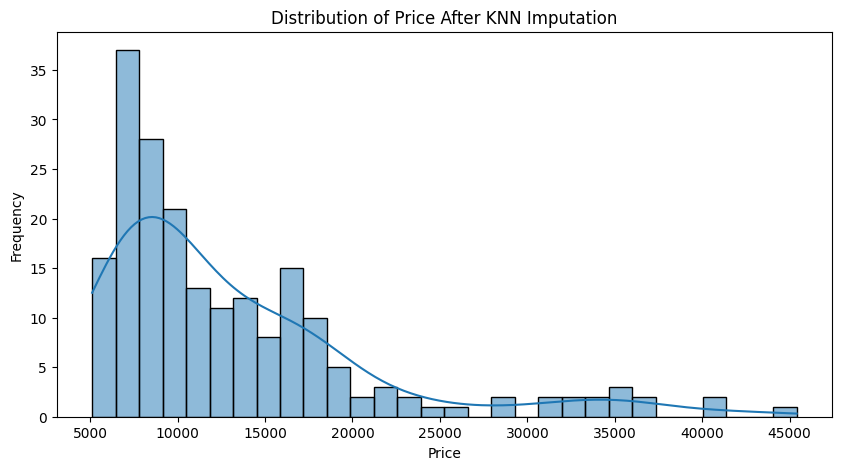

In [98]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price After KNN Imputation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

We used KNN imputation for the stated numerical variables to reduce the bias that would arise from simplistic imputation. The distribution remained largely unchanged for the most part.

In [93]:
df_copy['num-of-doors'] = df_copy.groupby('body-style')['num-of-doors'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

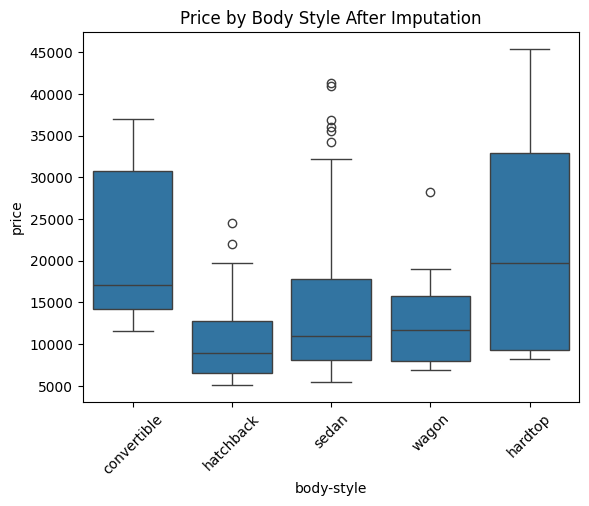

In [96]:
sns.boxplot(x='body-style', y='price', data=df_copy)
plt.title('Price by Body Style After Imputation')
plt.xticks(rotation=45)
plt.show()

Group-wise mode imputation by body-style was used.

### Consider the engine-size and stroke variables: Describe the specific feature scaling method you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the original content of these two variables. Next, apply your prescribed feature scaling methods to the two variables and create histograms and boxplots that show the results of your feature scaling efforts. Compare your newly created plots against the plots you created for the original content of the variables. Comment on whether your feature scaling efforts improved the distribution of the data. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

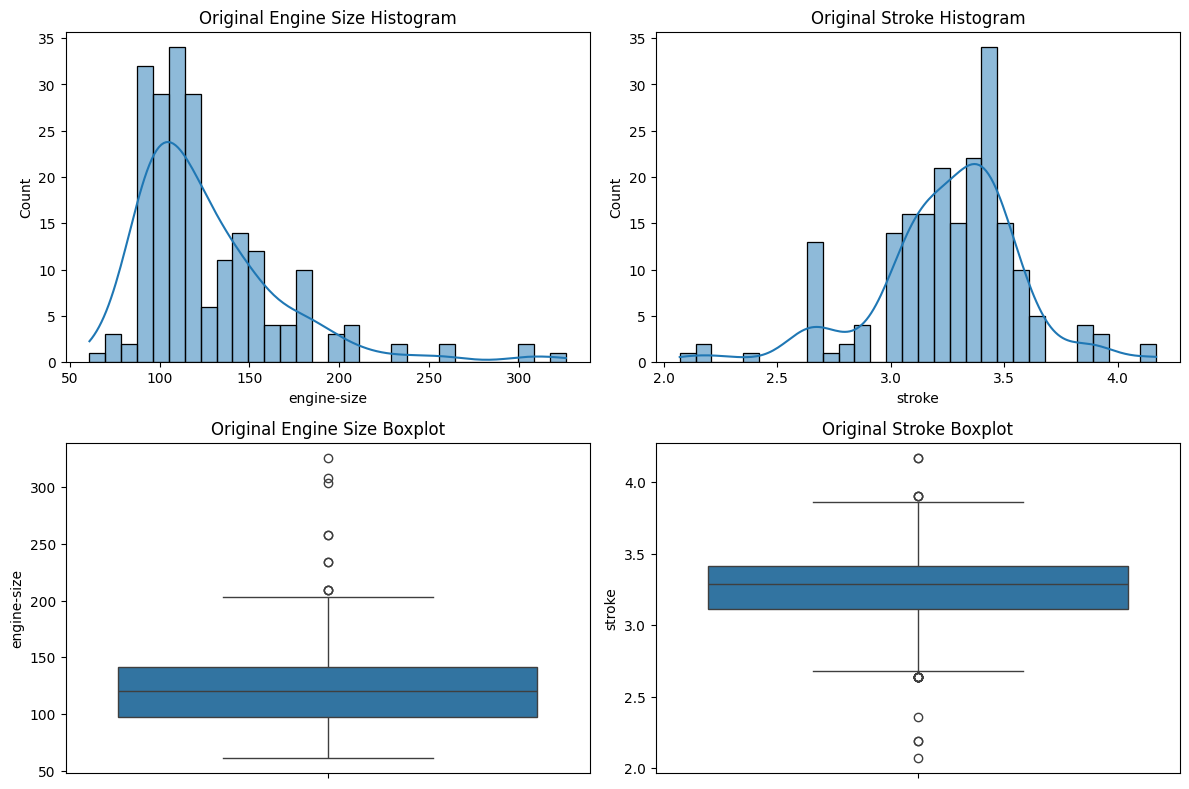

In [100]:
df_copy3 = df.copy()
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Engine size
sns.histplot(df_copy3['engine-size'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Original Engine Size Histogram')
sns.boxplot(y=df_copy3['engine-size'], ax=axes[1, 0])
axes[1, 0].set_title('Original Engine Size Boxplot')
# Stroke
sns.histplot(df_copy3['stroke'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Original Stroke Histogram')
sns.boxplot(y=df_copy3['stroke'], ax=axes[1, 1])
axes[1, 1].set_title('Original Stroke Boxplot')
plt.tight_layout()
plt.show()

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_copy3[['engine-size_scaled', 'stroke_scaled']] = scaler.fit_transform(df_copy3[['engine-size', 'stroke']])

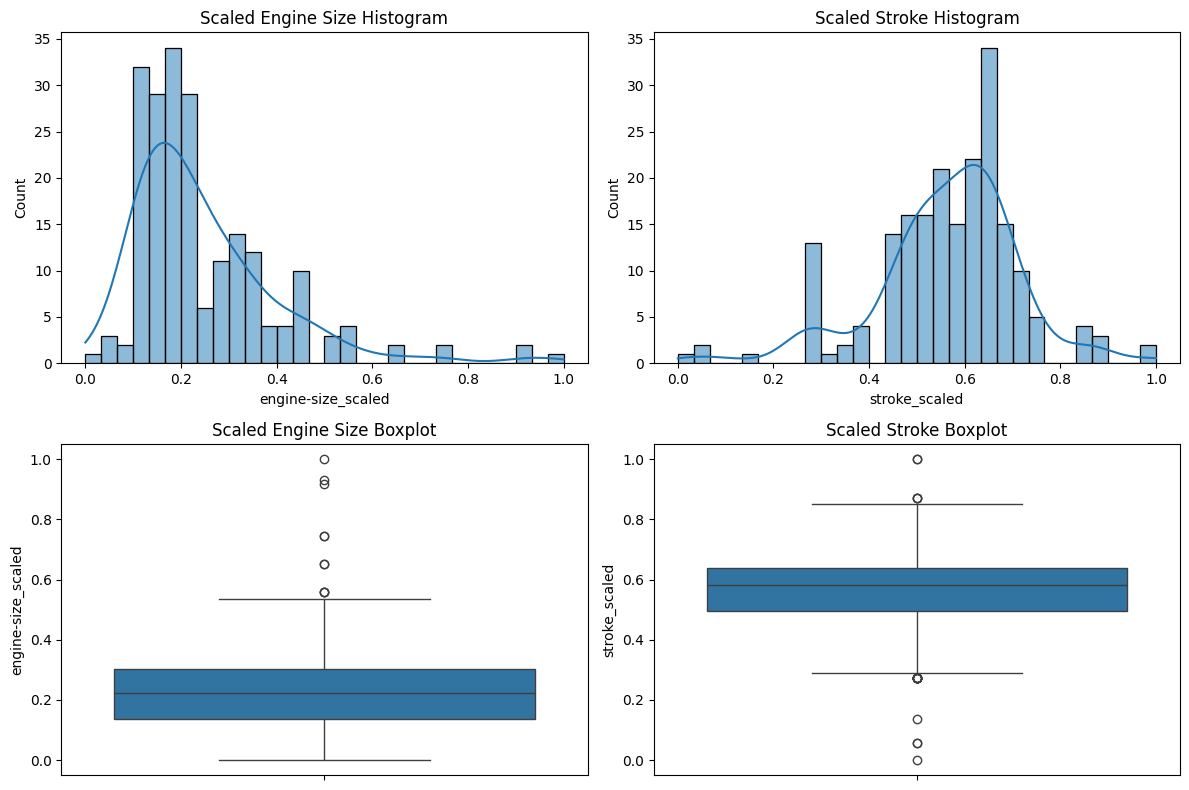

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Engine size scaled
sns.histplot(df_copy3['engine-size_scaled'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Scaled Engine Size Histogram')
sns.boxplot(y=df_copy3['engine-size_scaled'], ax=axes[1, 0])
axes[1, 0].set_title('Scaled Engine Size Boxplot')
# Stroke scaled
sns.histplot(df_copy3['stroke_scaled'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Scaled Stroke Histogram')
sns.boxplot(y=df_copy3['stroke_scaled'], ax=axes[1, 1])
axes[1, 1].set_title('Scaled Stroke Boxplot')
plt.tight_layout()
plt.show()

Based on the above plots, the min-max scaling reduced the range of the values for both variables to ensure that they would fall within 0 and 1. However, this did not transfrom the distribution as scaling makes the variables more suitable for machine learning algorithms but doesn't improve the distribution.

### Consider the symboling, make, and engine-type variables:
1. For each variable, specify whether its content is numeric/continuous, numeric/discrete,
categorical/nominal, or categorical/ordinal
2. For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm.
3. Using your Python skills, apply your prescribed data preparation methodologies to the three variables. Be sure to show a sample of your results within your Notebook.

1. Symboling is discrete numeric data. Make is categorical nominal data. Engine-type is categorical nominal data.

2. For symboling, it can be standardized if to be treated as ordinal. For the make, one-hot encoding could be used to convert each unique make into its own binary feature. For engine-type, one-hot encoding should be used since it has a nominal type.

In [105]:
# 3.
from sklearn.preprocessing import StandardScaler

df_copy4 = df.copy()
scaler = StandardScaler()
df_copy4['symboling_scaled'] = scaler.fit_transform(df_copy4[['symboling']])
df_encoded = pd.get_dummies(df_copy4[['make', 'engine-type']], drop_first=True, dtype=int)
df_res = pd.concat([df_copy4[['symboling_scaled']], df_encoded], axis=1)
df_res.head()

,symboling_scaled,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1.743470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.743470,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.133509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.938490,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.938490,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio, horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how many orthogonal features your approach has generated as well as how much variability is explained by each of your new features.

In [109]:
from sklearn.decomposition import PCA

df_copy5 = df.copy()
columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']
X = df_copy5[columns].dropna()
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cum_variance = explained_variance.cumsum()

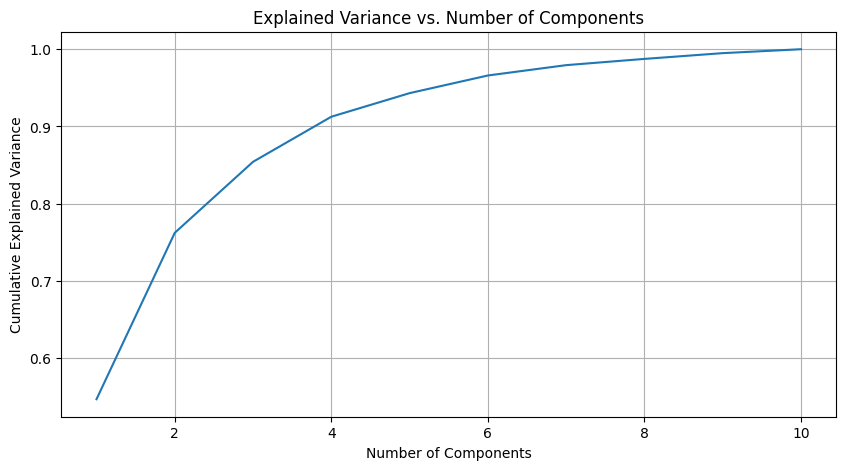

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cum_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

We apply PCA. Prior to doing this, we scale by standardizing the features to prevent variables with large ranges from having too much representation. After applying PCA, we plot the explained variance.